In [1]:
import numpy  as np
import healpy as hp
import time

from skylab.priors        import SpatialPrior
from config_GW            import config
from scipy.optimize       import curve_fit
from skylab.ps_injector   import PointSourceInjector
from scipy.stats          import chi2

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

Could not import from icecube, coordinate operations will not be possible


In [2]:
mpl.rcParams['font.size'] = 20

In [3]:
tsList= pd.read_csv('./maxTS_151226.csv') 
tsList=tsList.values
ts_csky=pd.read_csv('./maxTS_151226_csky.csv')
ts_csky=ts_csky.values

In [ ]:
""" Original code, from Raamis
######################### CONFIGURE ARGUEMENTS #############################
p = argparse.ArgumentParser(description="Calculates Sensitivity and Discovery"
                            " Potential Fluxes for Background Gravitational wave/Neutrino Coincidence study",
                            formatter_class=argparse.RawTextHelpFormatter)
p.add_argument("--ntrials", default=1000, type=int,
                help="Number of trials (default=1000")
p.add_argument("--pid", default=0, type=int,
                help="Process ID to save unique numpy array after running (Default=0)")
p.add_argument("--gw", default=151226, type=int,
                help="Date of GW event (yr-m-d) (default=151226)")
p.add_argument('--tw', default=3., type=float,
                help='Log10(time_window) to perform search in (default=3 which corresponds to 10^3 seconds)')
args = p.parse_args()
###########################################################################

###################### CONFIGURE LLH  ########################
seasons = ['GFU_v002p05','IC86, 2011-2018']
erange  = [0,10]
index = 2.
GW_time_dict = dict({150914:57279.41024306,151226:57382.152001999784,
                     151012:57307.4130028,170104:57757.42498380,
                     170608:57912.08421863,170729:57963.78922801,
                     170809:57974.35303009,170814:57979.43800382,
                     170817:57982.52852350,170818:57983.10079977,
                     170823:57988.55137153,})
GW_time = GW_time_dict[args.gw]
time_window = 10**args.tw/2/86400 #500 seconds in days
time_mask = [time_window,GW_time]

# For 2 week analysis
#time_window = 7.05 #half of 14+0.1 day time window
#time_mask = [time_window,GW_time+6.95] #[-0.1,14] day time window

#############################################################

############# LIGO SKYMAP ###############
fitsFile = '/data/user/rhussain/fitsFiles/GW%s_skymap.fits' % args.gw

### Read map and get probabilities
probs = hp.read_map(fitsFile)
nside = hp.pixelfunc.get_nside(probs)
probs = hp.pixelfunc.ud_grade(probs,nside_out=256,power=-2)
nside = 256


### Set up spatial prior to be used in scan
spatial_prior = SpatialPrior(probs,allow_neg=True,interpolated_ts_norm=True)
##########################################

llh = config(seasons,ncpu=7, days=5,timescramble=True,
             time_mask=time_mask,poisson=True)

### Set range of for loop so that multiple jobs 
### on the cluster will still all have unique 
### seedse
ntrials = args.ntrials
stop = ntrials * (args.pid+1)
start = stop-ntrials

tsList = []
for i in range(start,stop):
    val = llh.scan(0.0,0.0, scramble = True, seed = i,spatial_prior=spatial_prior,
                    time_mask = time_mask, pixel_scan=[nside,3.0]) #mask in pixel scan
    try:
        tsList.append(val['TS_spatial_prior_0'].max())
    except ValueError:
        tsList.append(-np.inf)
#np.save('/home/rhussain/icecube/dump/gw%s/bkgTrials/maxTS_%s.npy' % (args.gw,args.pid), tsList)"""

In [4]:
seasons = ['GFU_v002p05','IC86, 2011-2018']
erange  = [0,10]
index = 2.
GW_time_dict = dict({150914:57279.41024306,151226:57382.152001999784,
                     151012:57307.4130028,170104:57757.42498380,
                     170608:57912.08421863,170729:57963.78922801,
                     170809:57974.35303009,170814:57979.43800382,
                     170817:57982.52852350,170818:57983.10079977,
                     170823:57988.55137153,})

#parser not working for me?
gw=151226
pid=0
tw=3. #Log10(time_window) to perform search in (default=3 for 10^3 seconds)

GW_time = GW_time_dict[gw]
time_window = 10**tw/2/86400 #500 seconds in days
time_mask = [time_window,GW_time]

############# LIGO SKYMAP ###############
fitsFile = '/data/user/rhussain/fitsFiles/GW%s_skymap.fits' % gw

### Read map and get probabilities
probs = hp.read_map(fitsFile)
nside = hp.pixelfunc.get_nside(probs)
probs = hp.pixelfunc.ud_grade(probs,nside_out=256,power=-2)
nside = 256

NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [3]:
"""Skylab parts"""
### Set up spatial prior to be used in scan
spatial_prior = SpatialPrior(probs,allow_neg=True,interpolated_ts_norm=True)

llh = config(seasons,ncpu=7, days=5,timescramble=True,
             time_mask=time_mask,poisson=True)

In [6]:
ntrials=500
mod=20
stop = ntrials * (pid+1)
start = stop-ntrials

#tsList = []
for i in range(start,stop):
    val = llh.scan(0.0,0.0, scramble = True, seed = i,spatial_prior=spatial_prior,
                    time_mask = time_mask, pixel_scan=[nside,3.0])
    try:
        tsList.append(val['TS_spatial_prior_0'].max())
    except ValueError:
        tsList.append(-np.inf)
    if i%mod==0: print('%i / %i trials done.'%(i, ntrials))
print('Done.')

0 / 500 trials done.
20 / 500 trials done.
40 / 500 trials done.
60 / 500 trials done.
80 / 500 trials done.
100 / 500 trials done.
120 / 500 trials done.
140 / 500 trials done.
160 / 500 trials done.
180 / 500 trials done.
200 / 500 trials done.
220 / 500 trials done.
240 / 500 trials done.
260 / 500 trials done.
280 / 500 trials done.
300 / 500 trials done.
320 / 500 trials done.
340 / 500 trials done.
360 / 500 trials done.
380 / 500 trials done.
400 / 500 trials done.
420 / 500 trials done.
440 / 500 trials done.
460 / 500 trials done.
480 / 500 trials done.
Done.


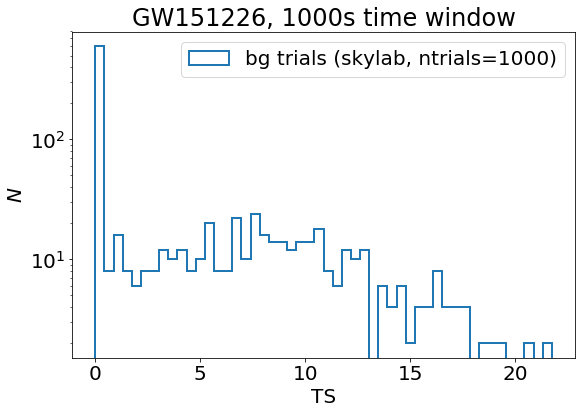

In [9]:
ts=[]
for i in range(0,len(tsList)):
    if tsList[i]<0: ts.append(0.)
    else: ts.append(tsList[i])
fig, ax = plt.subplots(figsize=(9,6))
mpl.rcParams['font.size'] = 20
ax.hist(ts, bins=50,histtype='step', lw=2., color='C0', 
        label='bg trials (skylab, ntrials=%i)'%(ntrials*2))

ax.set_title('GW%i, 1000s time window'%gw)
ax.semilogy()
ax.set_xlabel(r'TS')
ax.set_ylabel(r'$N$')
ax.legend()
plt.show()

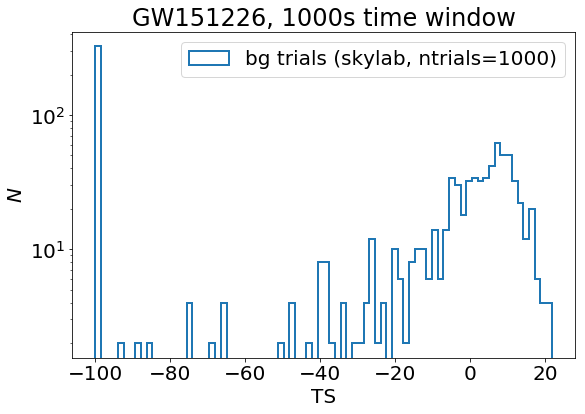

In [106]:
ts=[]
for i in range(len(tsList)):
    if tsList[i]<-100.: ts.append(-100.)
    else: ts.append(float(tsList[i]))
fig, ax = plt.subplots(figsize=(9,6))
mpl.rcParams['font.size'] = 20
ax.hist(ts, bins=80,histtype='step', lw=2.,# color='C0', 
        label='bg trials (skylab, ntrials=%i)'%(len(tsList)))

ax.set_title('GW%i, 1000s time window'%gw)
ax.semilogy()
ax.set_xlabel(r'TS')
ax.set_ylabel(r'$N$')
#plt.xlim([-75,25])
ax.legend()
plt.show()

In [88]:
#np.save('/home/jthwaites/FRB/maxTS_%s.npy'%(gw), tsList)
ts_data=pd.DataFrame.from_dict(data={'ts':tsList})
ts_data.to_csv('./maxTS_%s.csv'%(gw),index=False)

In [5]:
"""Csky parts"""
import csky as cy

ana_dir = cy.utils.ensure_dir('/home/jthwaites/csky_cache')
ana = cy.get_analysis(cy.selections.repo, 'version-002-p05', #use p6, check p5 for GW
                      cy.selections.GFUDataSpecs.GFU_IC86_2011_2018, dir=ana_dir)

conf = {'extended': True, #use extended LLH due to low time window
        'space': "ps",
        'time': "transient",
        'sig': 'transient',
        'ana':ana,
        'mp_cpus': 3
        }
cy.CONF.update(conf)

Setting up Analysis for:
GFU_for_2011_2012_2013_2014_2015_2016_2017_2018
Setting up GFU_for_2011_2012_2013_2014_2015_2016_2017_2018...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2011_MC.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2011_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2012_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2013_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2014_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2015_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2016_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2017_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/IC86_2018_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/GRL/IC86_2011_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/GRL/IC86_2012_data.npy ...
Reading /data/ana/analyses/gfu/version-002-p05/GRL/IC86_2013_data.npy ...
Reading /data/a

In [6]:
###probs (map), nside already defined above for spatial prior
src=cy.utils.Sources(mjd=GW_time_dict[151226],
                     t_100=1000/84600., sigma_t=0.)
tr = cy.get_spatial_prior_trial_runner(conf, ana=ana,llh_priors=probs, 
                     src_tr=src, refine_max=False, get_pixmask=True)

/mnt/lfs7/user/jthwaites/csky/csky/trial.py:1119: RuntimeWarning: divide by zero encountered in log
  pt = np.log(pt)


In [7]:
result=tr.get_one_fit(poisson=True, logging=True)
print('TS, ns, gamma (ra,dec) = {:.2f}, {:.2f}, {:.2f} ({:.2f}, {:.2f})'.format(
    result[1], result[2], result[3], *np.degrees(result[-2:])))

Scanning 9018 locations using 1 cores:
       9018/9018 coordinates complete.   
TS, ns, gamma (ra,dec) = 6.73, 0.99, 2.09 (99.59, 56.06)


array([6.72556751, 6.72556751, 0.99085751, 2.09358807, 1.73817626,
       0.97850938])

In [57]:
#trial=tr.get_one_trial(poisson=True)
result = tr.get_many_fits(100,poisson=True, logging=True)
ts_csky=list(result.ts)

Performing 100 background trials using 3 cores:
        100/100 trials complete.   


In [70]:
result = tr.get_many_fits(500,poisson=True, logging=True)
for ts in result.ts:
    ts_csky.append(ts)

Performing 500 background trials using 3 cores:
        500/500 trials complete.   


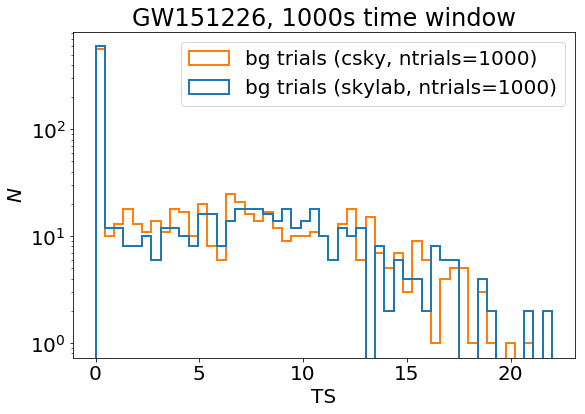

In [111]:
plot_both=True

fig, ax = plt.subplots(figsize=(9,6))
mpl.rcParams['font.size'] = 20
bins=np.linspace(0,22,num=50)
ax.hist(ts_csky, bins=bins,histtype='step', lw=2., color='C1', 
        label='bg trials (csky, ntrials=%i)'%(len(ts_csky)))

if plot_both==True:
    ts=[]
    for i in range(len(tsList)):
        if tsList[i]<0.: ts.append(0.)
        else: ts.append(float(tsList[i]))
    ax.hist(ts, bins=bins,histtype='step', lw=2., color='C0', 
        label='bg trials (skylab, ntrials=%i)'%(len(tsList)))

ax.set_title('GW%i, 1000s time window'%gw)
ax.semilogy()
ax.set_xlabel(r'TS')
ax.set_ylabel(r'$N$')
#plt.xlim([-75,25])
ax.legend()
plt.savefig('./bg_dist.png')

In [136]:
ts_cd=pd.DataFrame.from_dict(data={'ts':ts_csky})
ts_cd.to_csv('./maxTS_%s_csky.csv'%(gw),index=False)

In [7]:
"""Sensitivity"""
tr=cy.get_spatial_prior_trial_runner(conf,ana=ana,src_tr=src, get_pixmask=True,
        inj_conf={'flux':cy.hyp.PowerLawFlux(2.)},llh_priors=probs, refine_max=False)

In [8]:
result=tr.get_one_fit(poisson=True, logging=True)
print('TS, ns, gamma (ra,dec) = {:.2f}, {:.2f}, {:.2f} ({:.2f}, {:.2f})'.format(
    result[1], result[2], result[3], *np.degrees(result[-2:])))

Scanning 1124 locations using 1 cores:
       1124/1124 coordinates complete.   
TS, ns, gamma (ra,dec) = 0.00, 0.00, 0.00 (215.61, -42.21)


In [ ]:
sens=tr.find_n_sig(np.median(ts_csky),0.9, tol=0.03,n_sig_step=1)

Start time: 2021-08-13 14:01:44.546626
Using 3 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 1.000 ...

Process Process-2:
Traceback (most recent call last):
  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lfs7/user/jthwaites/csky/csky/trial.py", line 310, in _get_some_fits
    fit = self.get_one_fit(n_sig=n_sig, poisson=poisson, seed=seeds[i], **kw)
Process Process-1:
  File "/mnt/lfs7/user/jthwaites/csky/csky/trial.py", line 289, in get_one_fit
    return self.get_one_fit_from_trial(evss_ns_excluded_tuple, flat=flat, **fitter_args)
Traceback (most recent call last):
  File "/mnt/lfs7/user/jthwaites/csky/csky/trial.py", line 1218, in get_one_fit_from_trial
    scan = self.get_one_scan_from_trial(trial, logging=logging, mp_cpus=mp_cpus, **fitter_args)
  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/